# Spam Classification with SVM

In [1]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)


FILE_PATH = "./"
FILE_NAME = "spambase.data"

def load_data(file_path=FILE_PATH, file_name = FILE_NAME):
    csv_path = os.path.join(file_path,file_name)
    return pd.read_csv(csv_path)

data = load_data()

print("File Size:",(os.stat(FILE_NAME).st_size / (1024*1024)) , "MB")
rows, columns = data.shape
print ("No. of Entries: ",rows)
print ("No. of Features: ",columns)
print("Statistics")

attributes = list(data)
data.describe()


File Size: 0.6703777313232422 MB
No. of Entries:  4600
No. of Features:  58
Statistics


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [2]:
with open("feature_names.txt", "r") as feat_names:
    column = feat_names.read().splitlines()
column

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [3]:
data.columns = column
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_status
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
corr_matrix = data.corr()
corr_matrix["spam_status"].sort_values(ascending=False)

spam_status                   1.000000
word_freq_your                0.383265
word_freq_000                 0.334924
word_freq_remove              0.332255
char_freq_$                   0.323769
word_freq_you                 0.273657
word_freq_business            0.263338
word_freq_free                0.263236
capital_run_length_total      0.249208
word_freq_our                 0.241958
char_freq_!                   0.241771
word_freq_receive             0.234651
word_freq_over                0.232741
word_freq_order               0.231680
word_freq_money               0.216206
capital_run_length_longest    0.216121
word_freq_internet            0.206915
word_freq_email               0.203777
word_freq_all                 0.196840
word_freq_addresses           0.195987
word_freq_credit              0.189839
word_freq_mail                0.139088
word_freq_people              0.133034
word_freq_make                0.126323
capital_run_length_average    0.110030
word_freq_font           

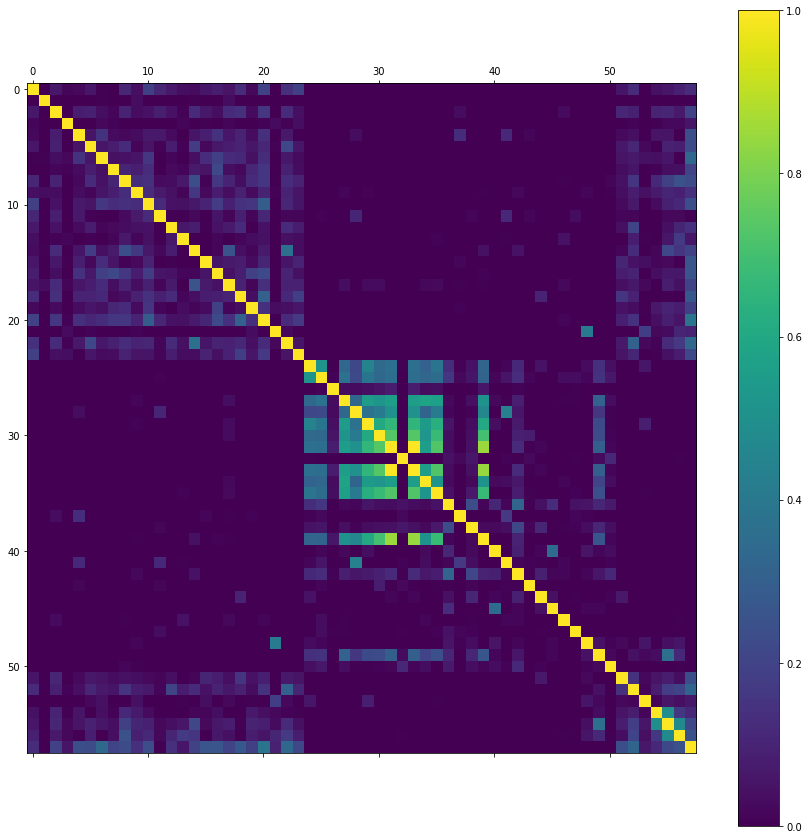

In [6]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A0B57B8>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

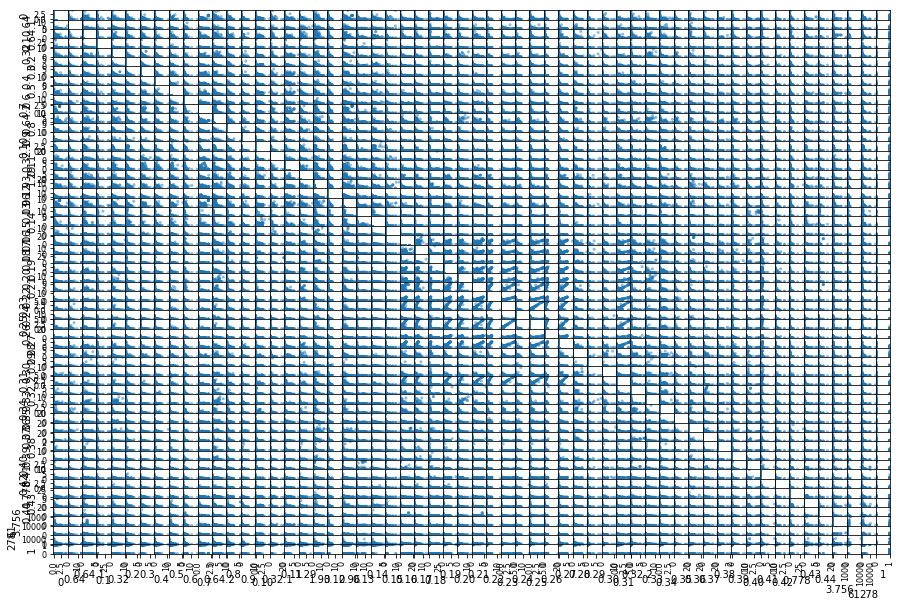

In [6]:
scatter_matrix(data, figsize=(15, 10))

In [7]:
data_incomplete = data[data.isnull().any(axis = 1)].head()
#data_incomplete
imputer = Imputer(strategy="median")
imputer.fit(data)
data_set_final = imputer.transform(data)
data_set_final = pd.DataFrame(data_set_final,columns=data.columns,index=list(data.index.values))



data_label = data_set_final["spam_status"]
dataSetFinal = data_set_final.drop("spam_status",axis=1)

y_intact = data_label
#data_label = (data_label == 1.0) 


from sklearn import preprocessing
dataSetFinal = preprocessing.scale(dataSetFinal)


#combinedData = np.column_stack((dataSetFinal,data_label))


X_train, X_test, y_train, y_test = train_test_split(dataSetFinal, data_label,test_size=0.2, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


3680
3680
920
920


- - -
## TRAINING SVM FOR SPAM CLASSIFICATION

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Training the svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train, y_train)
y_test_pred = svm_clf.predict(X_test)


print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("Precision: ",  precision_score(y_test, y_test_pred) )
print("Recall: ",  recall_score(y_test, y_test_pred) )
print("F1 Score: ",  f1_score(y_test, y_test_pred))



Accuracy:  0.9217391304347826
Confusion Matrix: 
[[505  25]
 [ 47 343]]
Precision:  0.9320652173913043
Recall:  0.8794871794871795
F1 Score:  0.9050131926121373


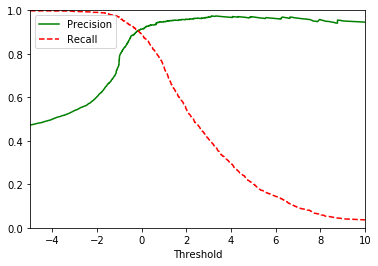

In [9]:
#draw curves
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "g-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "r--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.xlim([-5, 10])

from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [10]:
from sklearn.model_selection import cross_validate
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
acc = cross_validate(svm_clf.fit(X_train, y_train), X_train, y_train, cv=5, scoring = scoring1)


print(acc['test_accuracy'], " ", acc['test_accuracy'].mean())
print(acc['test_precision'], " ", acc['test_precision'].mean())
print(acc['test_recall'], " ", acc['test_recall'].mean())
print(acc['test_f1'], " ", acc['test_f1'].mean())


[0.91994573 0.94029851 0.93070652 0.92517007 0.93605442]   0.9304350489827222
[0.90070922 0.92579505 0.92057762 0.93869732 0.93090909]   0.9233376598213926
[0.89122807 0.91929825 0.89788732 0.86267606 0.90140845]   0.8944996293550778
[0.89594356 0.92253521 0.90909091 0.89908257 0.91592129]   0.9085147079580789


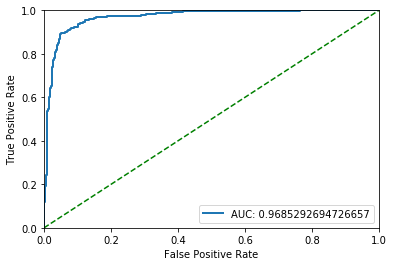

In [11]:
#ROC Curve
from sklearn import metrics
def plot_roc_curve(fpr, tpr, label1):
    plt.plot(fpr, tpr, linewidth=2, label=label1)
    plt.plot([0, 1], [0, 1], 'g--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

y_test_pred = svm_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plot_roc_curve(fpr, tpr, "AUC: "+str(metrics.roc_auc_score(y_test, y_test_pred)))
#plt.plot(fpr,tpr,label="AUC: "+str(metrics.roc_auc_score(y_test, y_test_pred)))
plt.legend()
plt.show()


In [12]:
#ROC AUC 
from sklearn.metrics import roc_auc_score
print("ROC AUC: ",roc_auc_score(y_test, y_test_pred))

ROC AUC:  0.9685292694726657


- - -
## TUNING C FOR LINEAR SVM

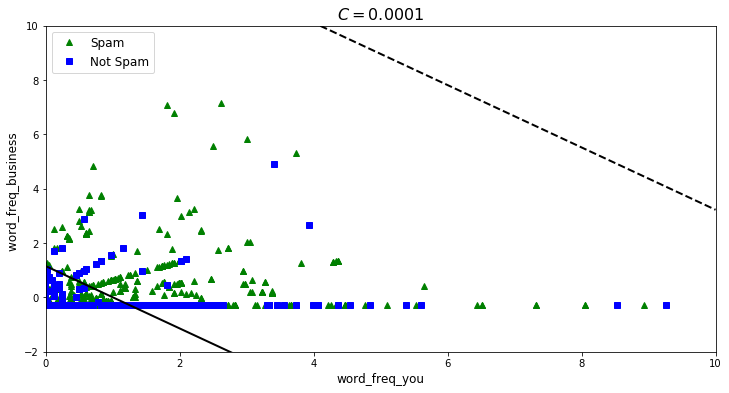

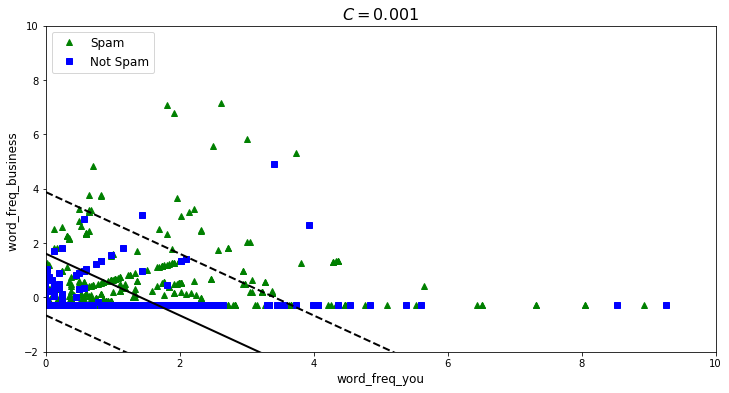

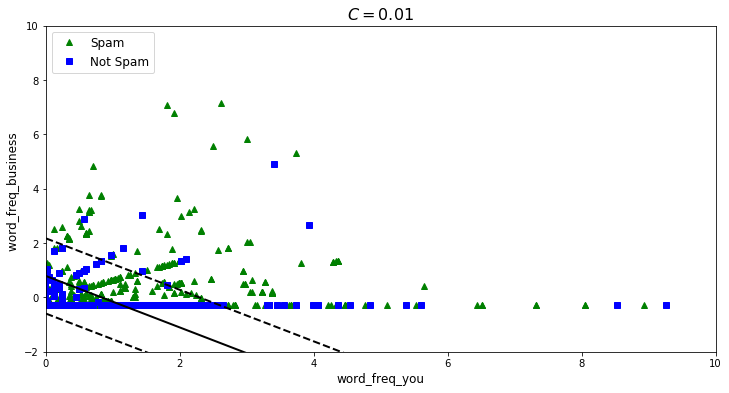

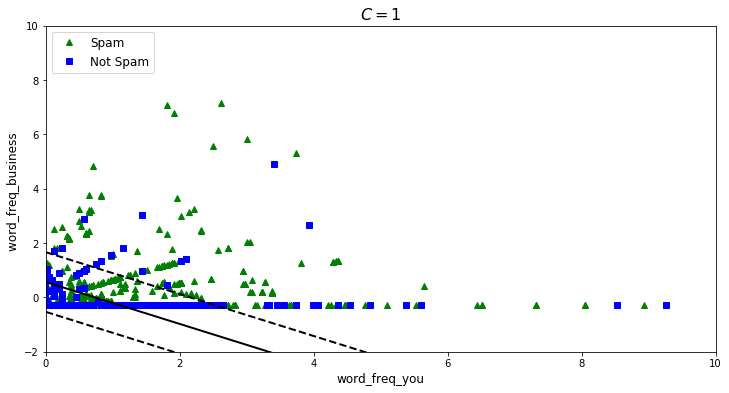

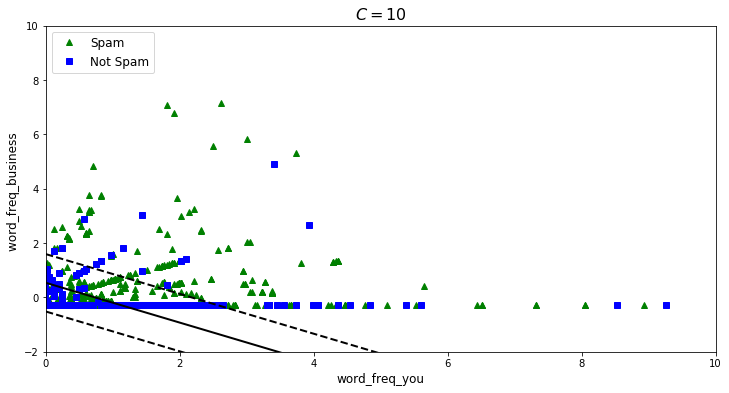

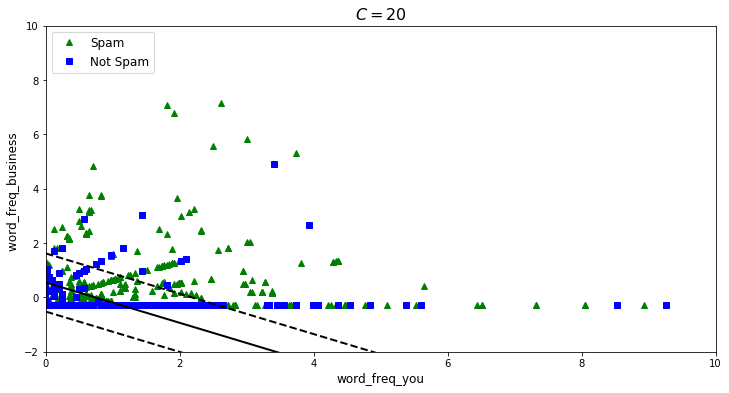

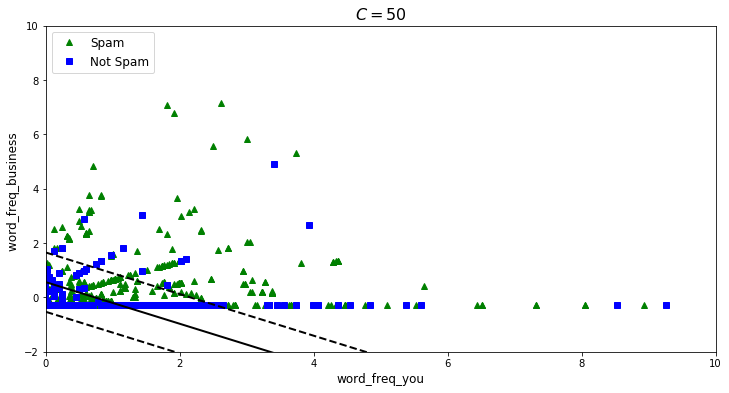

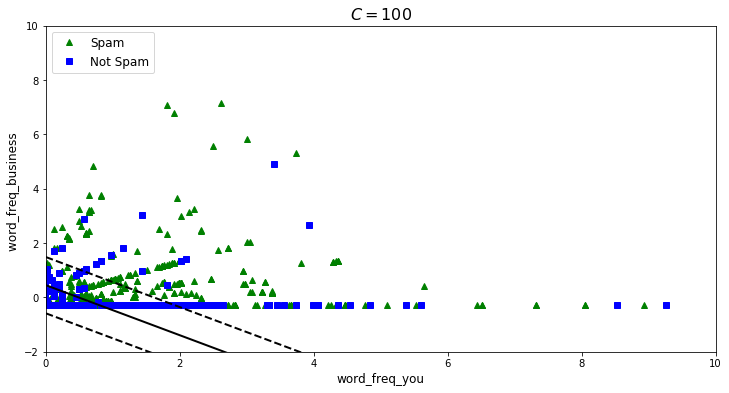

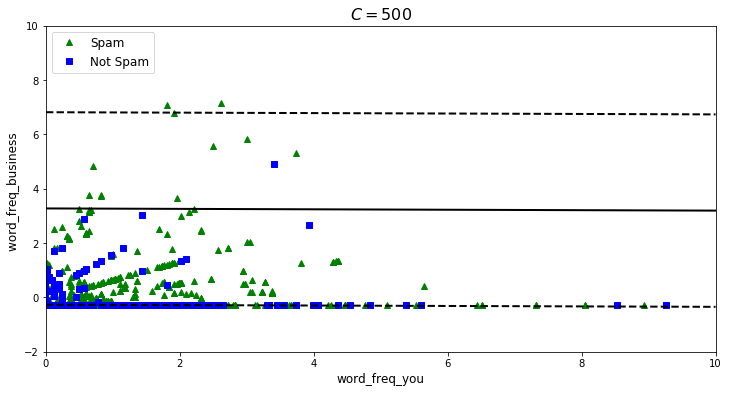

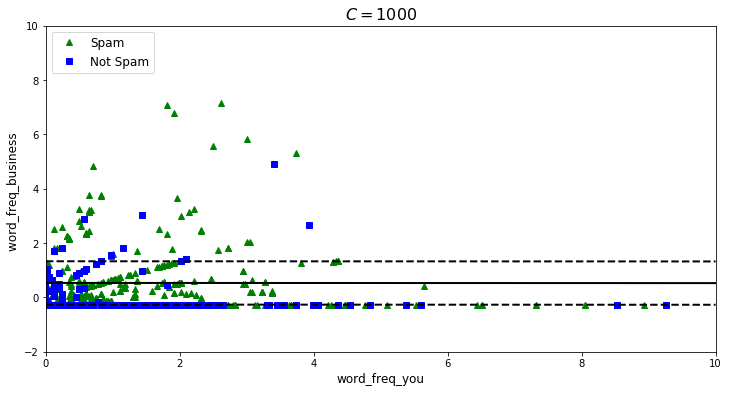

In [13]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)



#5,7 // 17,18
X = X_train[:, [5,7]]
y = y_train[:]

C = [.0001, 0.001, 0.01, 1, 10, 20, 50, 100, 500, 1000]

for i in range(len(C)):
    scaler = StandardScaler()
    svm_clf1 = LinearSVC(C=C[i], loss="hinge", random_state=42)
    scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
    scaled_svm_clf1.fit(X, y)
    
    # Convert to unscaled parameters
    b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
    w1 = svm_clf1.coef_[0] / scaler.scale_
    svm_clf1.intercept_ = np.array([b1])
    svm_clf1.coef_ = np.array([w1])
    
    # Find support vectors (LinearSVC does not do this automatically)
    t = y * 2 - 1
    support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
    svm_clf1.support_vectors_ = X[support_vectors_idx1]

    plt.figure(figsize=(12,6))
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Spam")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Not Spam")
    plot_svc_decision_boundary(svm_clf1, 0, 10)
    plt.xlabel("word_freq_you", fontsize=12)
    plt.ylabel("word_freq_business ", fontsize=12)
    plt.legend(loc="upper left", fontsize=12)
    plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
    plt.axis([0, 10, -2, 10])
#y_train

## SELECTING THE FEATURES WITH SVM

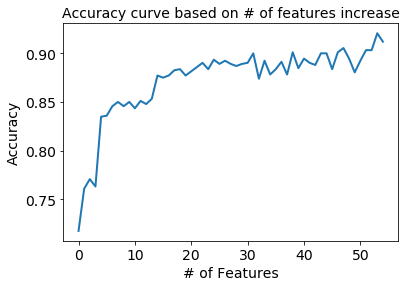

In [14]:
def k_largest_index_argsort(a, k):
    idx = np.argsort(a.ravel())[:-k-1:-1]
    return np.column_stack(np.unravel_index(idx, a.shape))


scaler = StandardScaler()
svm_clf = LinearSVC(C=20, loss="hinge", random_state=42)
scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])
scaled_svm_clf.fit(X_train, y_train)



w = svm_clf.coef_[0]

accuracy = []
for i in range(2,57):
    indices = k_largest_index_argsort(w,i).flatten()
    #indices.tolist()
    #print(indices)
    svm_clf = LinearSVC(C=20, loss="hinge", random_state=42)
    svm_clf.fit(X_train[:,indices], y_train)
    y_test_pred = svm_clf.predict(X_test[:,indices])
    acc = accuracy_score(y_test, y_test_pred)
    #print("Accuracy: ", acc)
    accuracy.append(acc)
    #scaled_svm_clf1.fit(X_train[:,(indices.tolist())], y)

    
plt.plot(accuracy,linewidth=2)
plt.title('Accuracy curve based on # of features increase',fontsize=14)
plt.xlabel('# of Features',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.show()

## KERNELIZING SVM WITH THE GAUSSIAN RBF

In [15]:
from sklearn.svm import SVC
#hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2), ...
#gamma = [0.01,0.05,0.09,0.1,0.5,1,5,7,10,15]
#C = [.0001, 0.001, 0.01, 1, 10, 20, 50, 100, 500, 1000]

gamma = [0.01, 0.1,1,5,15]
C = [0.01, 1, 10, 20,  500]

best_gamma = gamma[0]
bext_C = C[0]

accuracy = []
max_accuracy = 0.0
max_recall = 0.0
max_precision =0.0
max_f1Score = 0.0
for i in range(len(C)):
    for j in range(len(gamma)):
        rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma[j], C=C[i])
        rbf_kernel_svm_clf.fit(X_train, y_train)
        y_test_pred = rbf_kernel_svm_clf.predict(X_test)
        
        acc = accuracy_score(y_test, y_test_pred)
        if (acc > max_accuracy):
            max_accuracy = acc
            best_gamma = gamma[j]
            best_C = C[i]
        
        pre = precision_score(y_test, y_test_pred)
        if (pre > max_precision):
            max_precision = pre
        
        fs = f1_score(y_test, y_test_pred)
        if (fs > max_f1Score):
            max_f1Score = fs
        rc = recall_score(y_test, y_test_pred)
        if (rc > max_recall):
            max_recall = rc
        #break


print("Best Gamma: ", best_gamma," Best C: ", best_C)
print("Max Accuracy: ",  max_accuracy)
print("Max Precision: ",  max_precision)
print("Max Recall: ",  max_recall)
print("Max F1 Score: ",  max_f1Score)

C:\Users\BAHMED\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\BAHMED\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Gamma:  0.01  Best C:  1
Max Accuracy:  0.9260869565217391
Max Precision:  0.9926470588235294
Max Recall:  0.8743589743589744
Max F1 Score:  0.9090909090909091


In [16]:
#Using grid search
from sklearn.model_selection import GridSearchCV
gamma_C_grid = {"gamma": gamma, "C": C}
clf = GridSearchCV(SVC(), gamma_C_grid, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'gamma': 0.01}


In [18]:
best_gamma_gridS = 0.01
best_C_gridS = 10
best_clf = SVC(kernel="rbf", gamma=best_gamma_gridS, C=best_C_gridS)
best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)
acc_k = accuracy_score(y_test, y_test_pred)
pre_k = precision_score(y_test, y_test_pred)
fs_k = f1_score(y_test, y_test_pred)
rc_k = recall_score(y_test, y_test_pred)

print("Non Linear SVM with RBF:: Accuracy: ", acc_k, " Precision: ", pre_k, " F1 Score: ", fs_k, " Recall: ", rc_k)

Non Linear SVM with RBF:: Accuracy:  0.9228260869565217  Precision:  0.9418282548476454  F1 Score:  0.9054593874833555  Recall:  0.8717948717948718


In [19]:
svm_clf = LinearSVC(C=10, loss="hinge", random_state=42)
svm_clf.fit(X_train, y_train)
y_test_pred = svm_clf.predict(X_test)
acc_l = accuracy_score(y_test, y_test_pred)
pre_l = precision_score(y_test, y_test_pred)
fs_l = f1_score(y_test, y_test_pred)
rc_l = recall_score(y_test, y_test_pred)

print("Non Linear SVM with RBF:: Accuracy: ", acc_l, " Precision: ", pre_l, " F1 Score: ", fs_l, " Recall: ", rc_l)

Non Linear SVM with RBF:: Accuracy:  0.9206521739130434  Precision:  0.9249329758713136  F1 Score:  0.9043250327653997  Recall:  0.8846153846153846


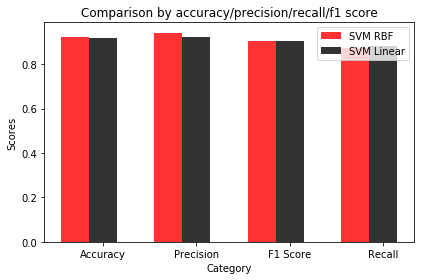

In [20]:
n_groups = 4
SVM_kernel = (acc_k, pre_k, fs_k, rc_k)
SVM_liner = (acc_l, pre_l, fs_l, rc_l)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, SVM_kernel, bar_width,
                 alpha=opacity,
                 color='r',
                 label='SVM RBF')
 
rects2 = plt.bar(index + bar_width, SVM_liner, bar_width,
                 alpha=opacity,
                 color='k',
                 label='SVM Linear')
 
plt.xlabel('Category')
plt.ylabel('Scores')
plt.title('Comparison by accuracy/precision/recall/f1 score')
plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'F1 Score', 'Recall'))
plt.legend()
 
plt.tight_layout()
plt.show()

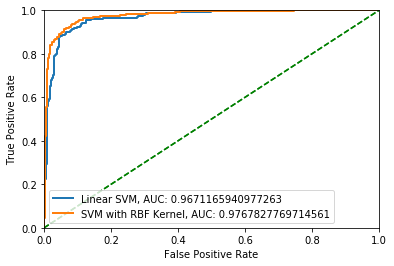

In [21]:
#ROC Curve
y_test_pred_linear = svm_clf.decision_function(X_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_test_pred_linear)

y_test_pred_kernel = best_clf.decision_function(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_test_pred_kernel)

plot_roc_curve(fpr1, tpr1, "Linear SVM, AUC: "+ str(roc_auc_score(y_test, y_test_pred_linear)))
plot_roc_curve(fpr2, tpr2, "SVM with RBF Kernel, AUC: "+ str(roc_auc_score(y_test, y_test_pred_kernel)))

plt.legend()
plt.show()